# Dataset Description:


* This dataset consists of 600 rows of simulated sales data designed for exploring polynomial regression relationships.
* It contains five key features related to product sales and a target variable, total revenue, which is generated based on a polynomial relationship with the features, plus some added random noise to simulate real-world variability.

# Features:
* product_category: Categorical feature representing the category of the product (values: 'A', 'B', 'C', 'D').

* units_sold: Number of units sold for the respective product (values: Integer, between 1 and 100).

* price_per_unit: Price of each unit in the respective sale (values: Float, ranging from 10 to 500).
* is_returned: Binary feature indicating whether the product was returned (0 for not returned, 1 for returned).

* sale_date: Date of the sale, ranging from January 1, 2020, onward.
* total_revenue (target variable): The total revenue generated from the sale, calculated using a polynomial function of the above features, plus a small amount of random noise for realism.























# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/sales_data_with_revenue.csv')

In [ ]:
df.head()

,product_category,units_sold,price_per_unit,is_returned,sale_date,total_revenue
0,C,96,356.542747,0,2020-01-01,5178.878929
1,D,94,386.211956,1,2020-01-02,4983.644721
2,A,47,52.772188,1,2020-01-03,1146.226516
3,C,99,257.990939,0,2020-01-04,5332.891565
4,C,55,466.687028,1,2020-01-05,2269.065707


In [ ]:
df.shape

(600, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_category  600 non-null    object 
 1   units_sold        600 non-null    int64  
 2   price_per_unit    600 non-null    float64
 3   is_returned       600 non-null    int64  
 4   sale_date         600 non-null    object 
 5   total_revenue     600 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 28.2+ KB


In [ ]:
df.dtypes

,0
product_category,object
units_sold,int64
price_per_unit,float64
is_returned,int64
sale_date,object
total_revenue,float64


In [ ]:
df.describe()

,units_sold,price_per_unit,is_returned,total_revenue
count,600.000000,600.000000,600.000000,600.000000
mean,49.755000,261.336305,0.498333,2060.081749
std,29.340753,142.508264,0.500414,1533.020936
min,1.000000,10.116387,0.000000,5.898860
25%,24.000000,136.865445,0.000000,752.983889
50%,51.000000,268.132628,0.000000,1622.882745
75%,75.000000,385.321422,1.000000,3182.433373
max,99.000000,499.683215,1.000000,5645.523507


In [ ]:
df.isnull().sum()

,0
product_category,0
units_sold,0
price_per_unit,0
is_returned,0
sale_date,0
total_revenue,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['product_category', 'units_sold', 'price_per_unit', 'is_returned',
       'sale_date', 'total_revenue'],
      dtype='object')

In [ ]:
df["is_returned"].value_counts()

,count
is_returned,
0,301
1,299


In [ ]:
df['is_returned'].nunique()

2

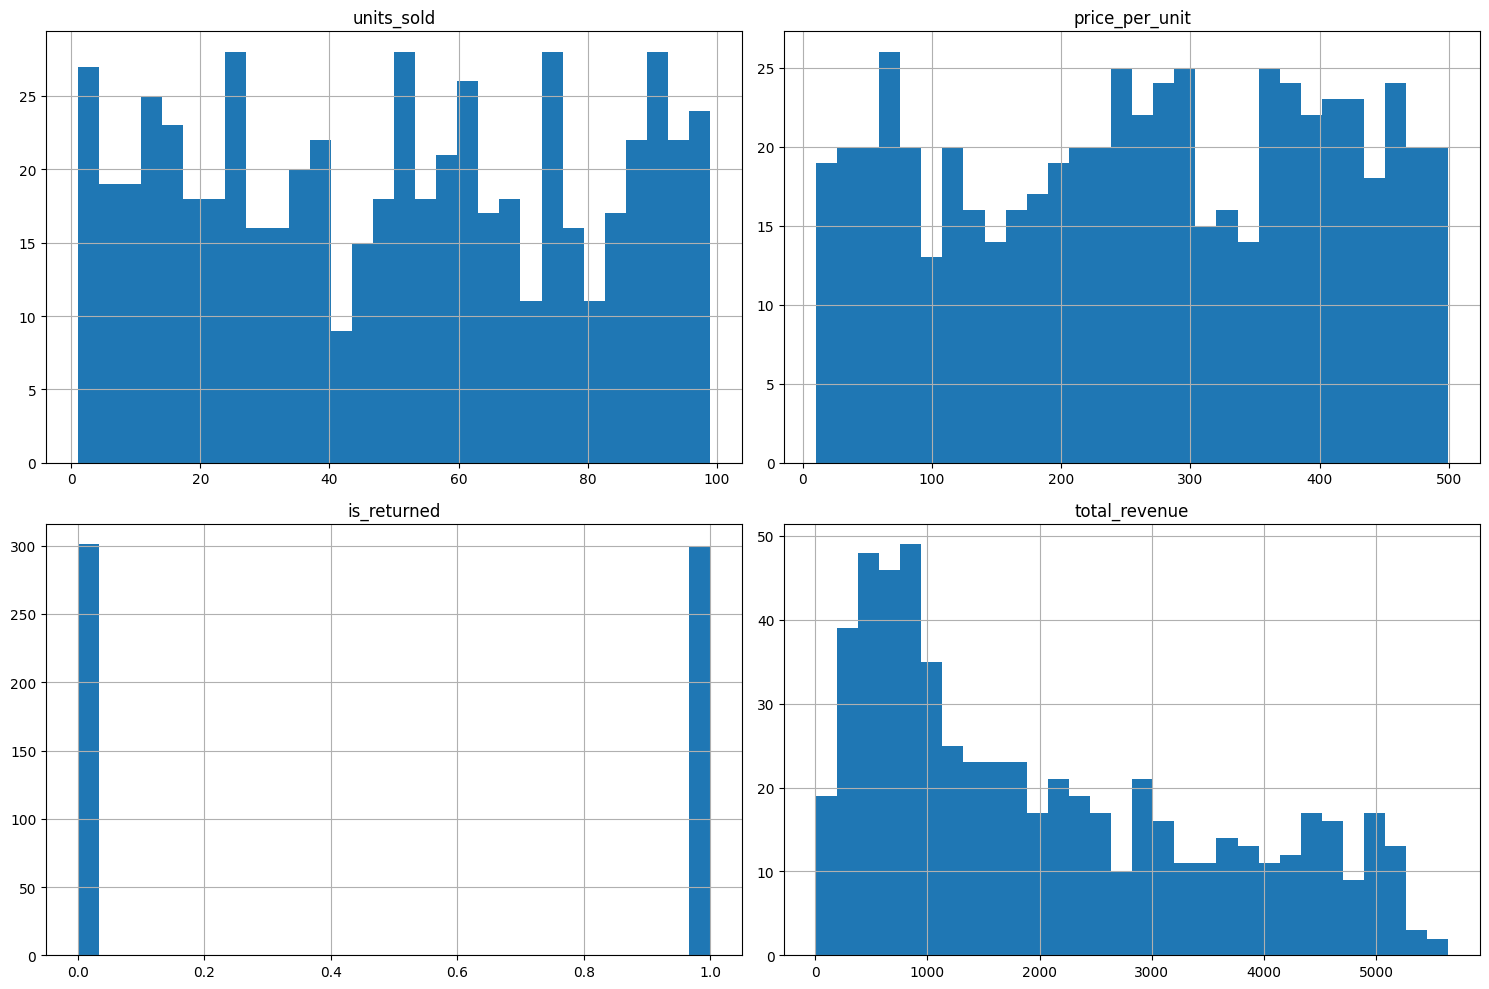

In [ ]:
#visualizing the distribution f each numerical coloumn
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

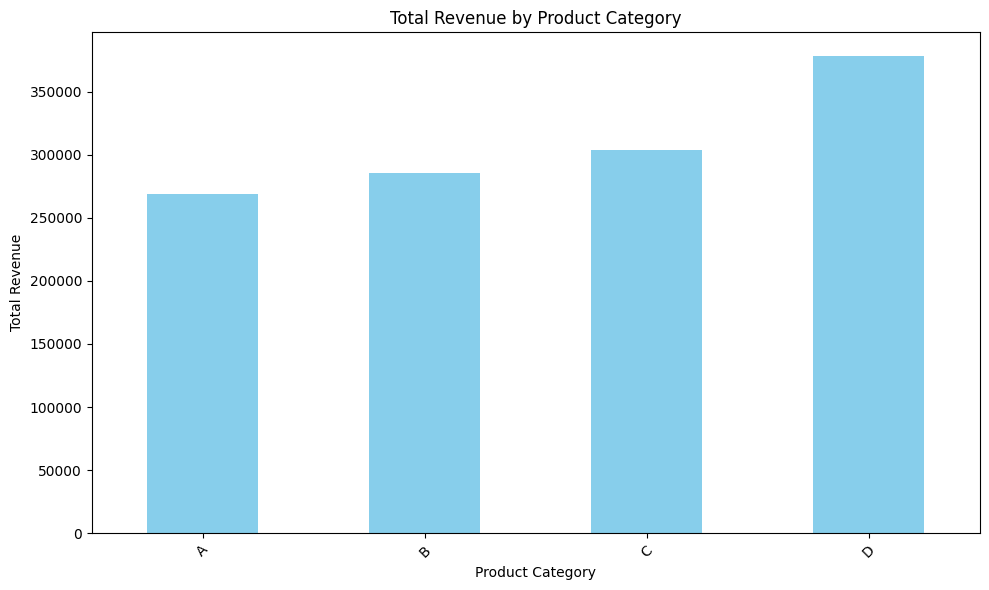

In [ ]:

category_revenue = df.groupby('product_category')['total_revenue'].sum()

# Create a bar plot
category_revenue.plot(kind='bar', figsize=(10, 6),color="skyblue")
plt.title('Total Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

(array([18262., 18322., 18383., 18444., 18506., 18567., 18628., 18687.,
        18748., 18809., 18871.]),
 [Text(18262.0, 0, '2020-01'),
  Text(18322.0, 0, '2020-03'),
  Text(18383.0, 0, '2020-05'),
  Text(18444.0, 0, '2020-07'),
  Text(18506.0, 0, '2020-09'),
  Text(18567.0, 0, '2020-11'),
  Text(18628.0, 0, '2021-01'),
  Text(18687.0, 0, '2021-03'),
  Text(18748.0, 0, '2021-05'),
  Text(18809.0, 0, '2021-07'),
  Text(18871.0, 0, '2021-09')])

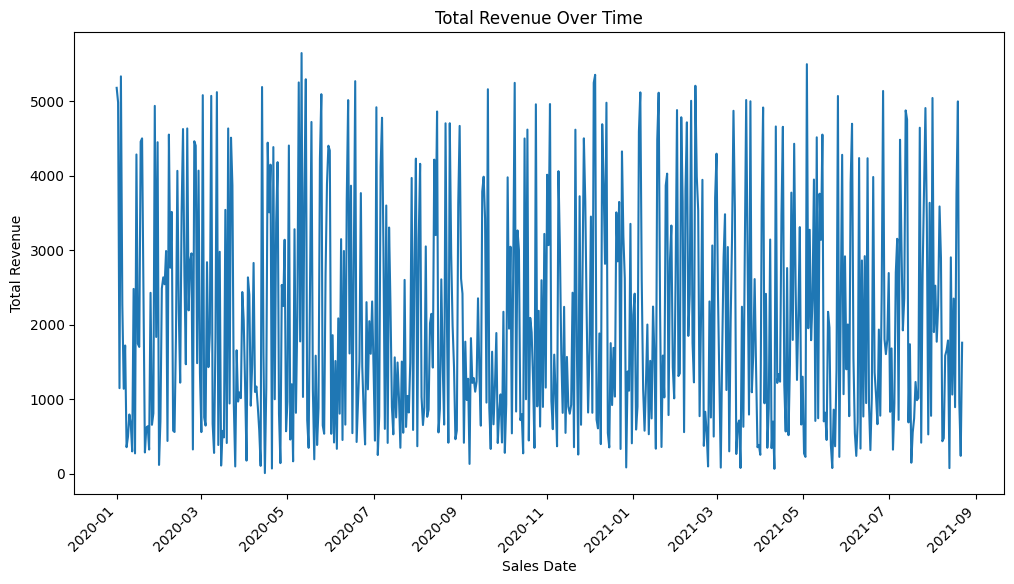

In [ ]:

df['sale_date'] = pd.to_datetime(df['sale_date'])
daily_revenue = df.groupby('sale_date')['total_revenue'].sum()


plt.figure(figsize=(12, 6))
plt.plot(daily_revenue.index, daily_revenue.values)
plt.title('Total Revenue Over Time')
plt.xlabel('Sales Date')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')

In [ ]:

numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

print(numerical_cols)

['units_sold', 'price_per_unit', 'is_returned', 'total_revenue']


In [ ]:
# Remove 'Total Revenue' from numerical_cols if it's present
if 'total_revenue' in numerical_cols:
    numerical_cols.remove('total_revenue')

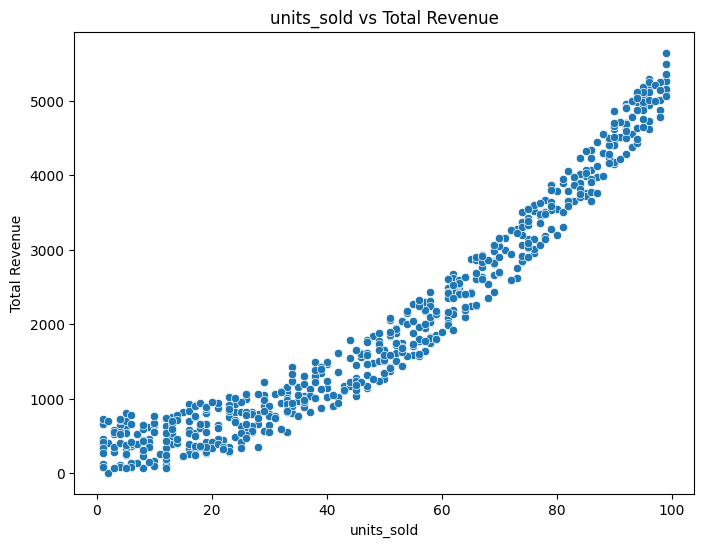

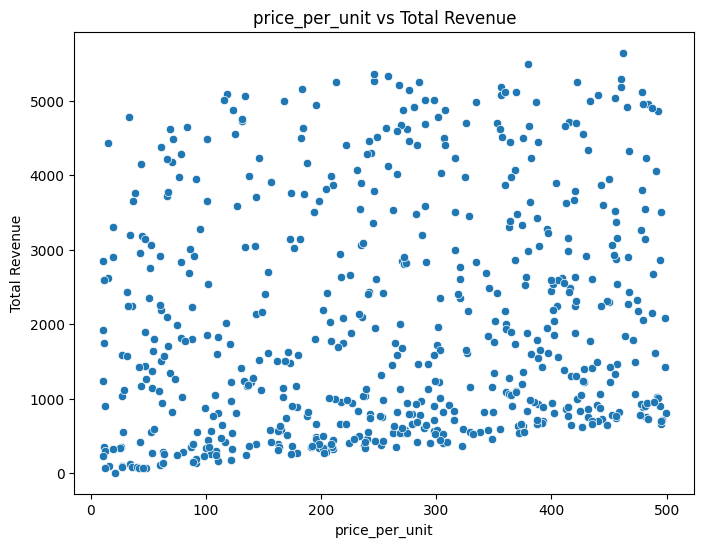

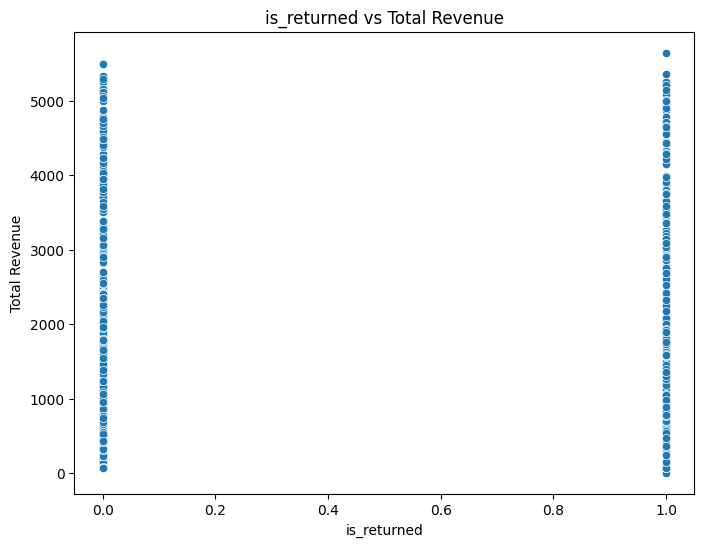

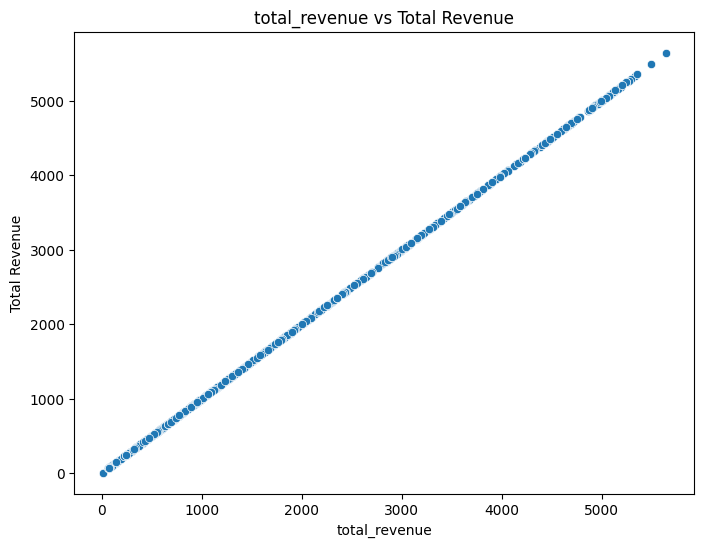

In [ ]:


# Create scatter plots for each numerical column against 'Total Revenue'
for col in numerical_cols:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.scatterplot(x=col, y='total_revenue', data=df)
    plt.title(f'{col} vs Total Revenue')
    plt.xlabel(col)
    plt.ylabel('Total Revenue')
    plt.show()

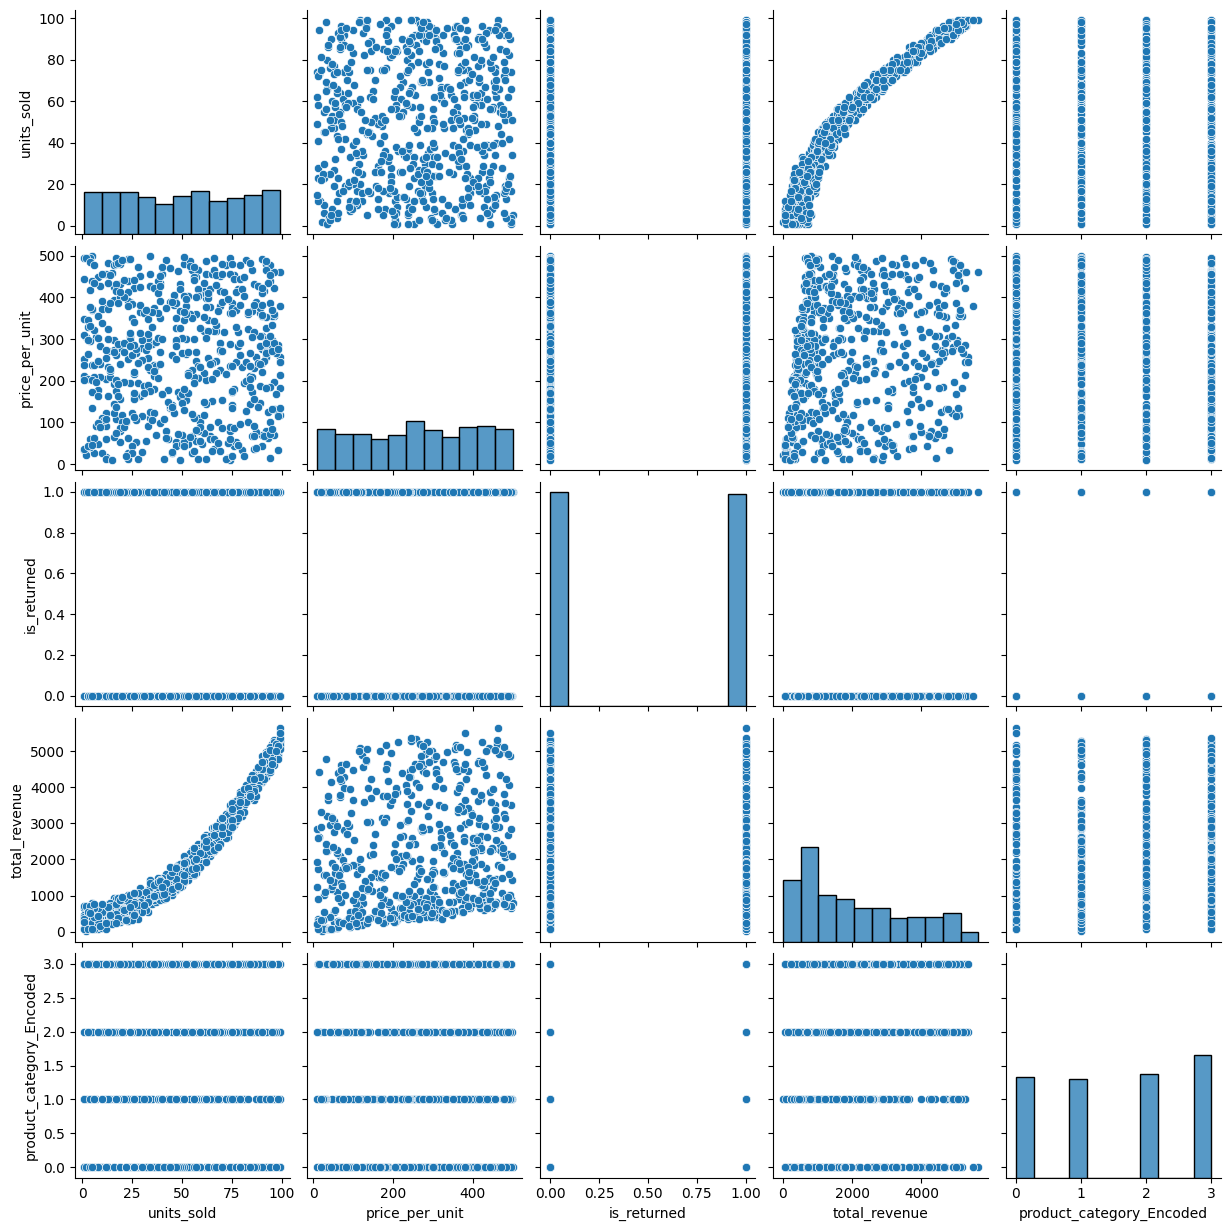

In [ ]:
import seaborn as sns
# Create the pairplot
sns.pairplot(df)  # Plots all numerical columns against each other
plt.show()

#Encoding product category

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['product_category_Encoded'] = label_encoder.fit_transform(df['product_category'])
df.head()

,product_category,units_sold,price_per_unit,is_returned,sale_date,total_revenue,product_category_Encoded
0,C,96,356.542747,0,2020-01-01,5178.878929,2
1,D,94,386.211956,1,2020-01-02,4983.644721,3
2,A,47,52.772188,1,2020-01-03,1146.226516,0
3,C,99,257.990939,0,2020-01-04,5332.891565,2
4,C,55,466.687028,1,2020-01-05,2269.065707,2


Correlation Matrix:
                          product_category  units_sold  price_per_unit  \
product_category                  1.000000    0.069681        0.014738   
units_sold                        0.069681    1.000000        0.016136   
price_per_unit                    0.014738    0.016136        1.000000   
is_returned                       0.007573    0.011399        0.004801   
sale_date                        -0.010832   -0.002953       -0.014938   
total_revenue                     0.066846    0.959236        0.155943   
product_category_Encoded          1.000000    0.069681        0.014738   

                          is_returned  sale_date  total_revenue  \
product_category             0.007573  -0.010832       0.066846   
units_sold                   0.011399  -0.002953       0.959236   
price_per_unit               0.004801  -0.014938       0.155943   
is_returned                  1.000000  -0.030552       0.014218   
sale_date                   -0.030552   1.000000    

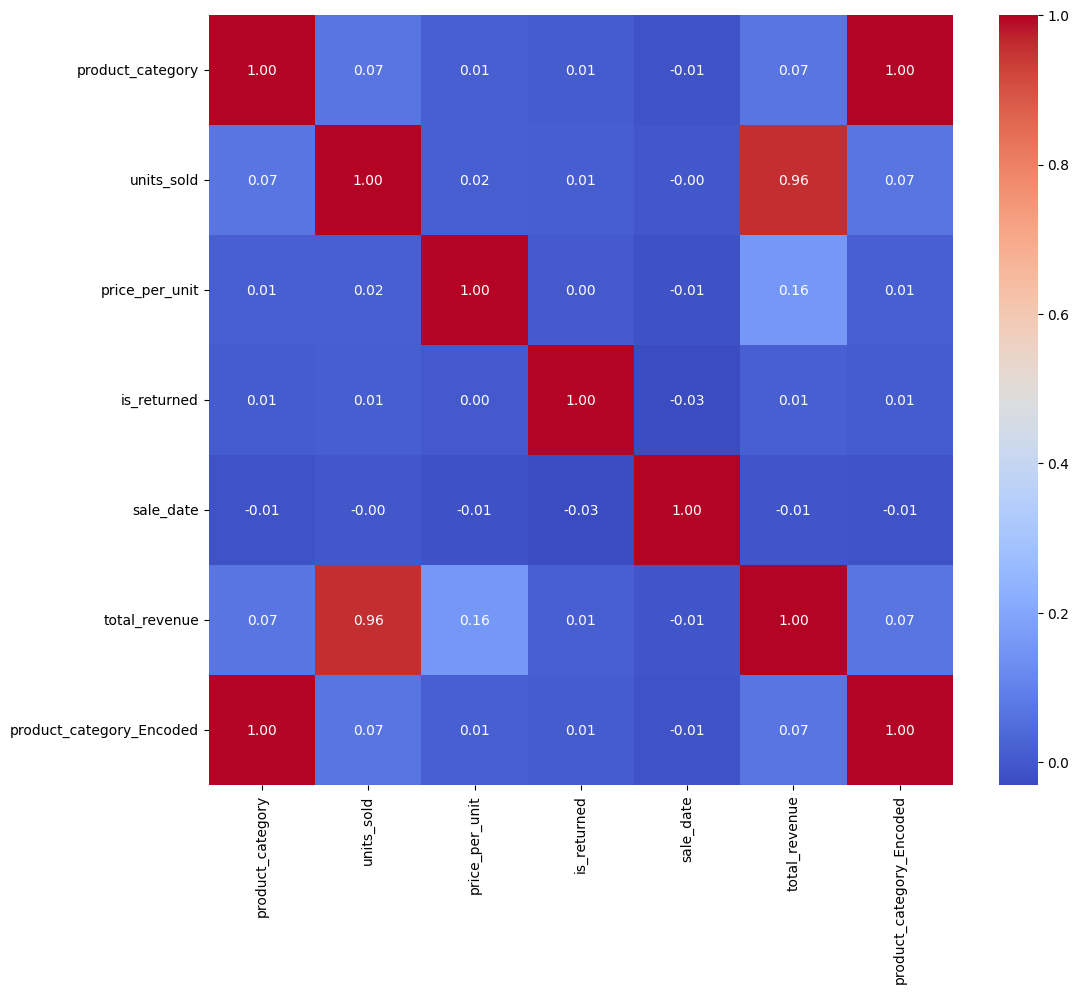

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataframe to avoid modifying the original
df_encoded = df.copy()


categorical_cols = df_encoded.select_dtypes(include=['object', 'category']).columns.tolist()

# Encode categorical columns using Label Encoding
label_encoder = LabelEncoder()
for col in categorical_cols:
  df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

correlation_matrix = df_encoded.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

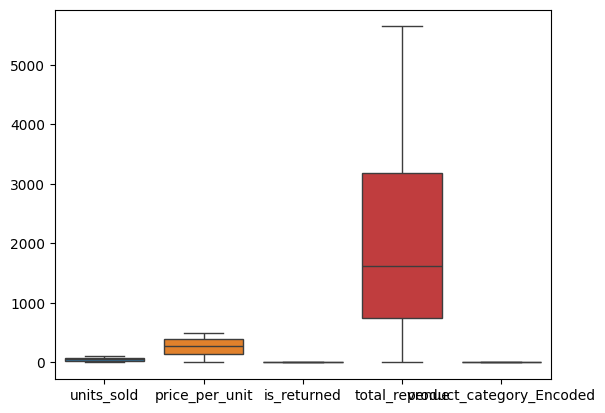

In [ ]:
sns.boxplot(data=df)
plt.show()

#Defining independent  (X) and  dependent(y) features





In [ ]:
X = df[['product_category_Encoded', 'units_sold', 'price_per_unit', 'is_returned']]  # Include relevant features

y = df['total_revenue']

# Print the shapes of X and y to verify the split
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (600, 4)
Shape of y: (600,)


#Preprocessing the data-splitting to test and train

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (480, 4)
Shape of X_test: (120, 4)
Shape of y_train: (480,)
Shape of y_test: (120,)


In [ ]:
X_train.head()

,product_category_Encoded,units_sold,price_per_unit,is_returned
145,2,99,117.847635,1
9,1,30,278.815528,0
375,3,34,427.882693,1
523,2,25,122.726305,1
188,2,93,301.574000,0


In [ ]:
X_test.head()

,product_category_Encoded,units_sold,price_per_unit,is_returned
110,3,8,47.887322,1
419,1,10,27.083929,1
565,1,31,169.703477,0
77,3,80,233.930107,1
181,2,58,421.496541,0


#Scaling the splitted data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
y_pred

array([ 24663.6060288 ,  23008.92204617,  86029.19591657, 173052.43494018,
       182347.42634253, 215782.95047011,  92637.83007678, 154279.27927361,
        73457.24838252,  65754.22299731, 197279.63536968, 182090.85047506,
       145396.42176411, 156041.17582913,  91609.1240396 , 134454.06613818,
        11112.18872068, 200369.54895388, 205720.57461491, 118203.04222374,
        83650.68353532, 117892.72182192,  98812.1290234 , 183537.42611555,
        61844.78210652, 108328.31913365,  59957.20961152, 104261.26773724,
       166193.7073473 , 203574.3411028 , 168121.28840719, 211647.99812984,
       173766.64326292, 128211.22776078,  78695.97733136, 106865.05875032,
       108769.21411245, 149301.85164501, 118843.18627851,  52220.98173998,
       171111.58853512, 215373.48878541,  56726.68153159,  64132.42280507,
       192544.69148743, 157156.74870763,  99413.48914368, 159126.43901391,
       100412.90586769, 167849.02024953, 152354.25161521, 107798.05346719,
        88584.63812251, 1

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 17942115600.766216
R-squared: -8614.497610764884


In [ ]:
lr.score(X_train_scaled, y_train)

0.9425140995152992

In [ ]:
lr.score(X_test_scaled, y_test)

0.9240444696221818

#Polynomial regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.fit_transform(X_test_scaled)



In [ ]:
poly_model = linear_model.LinearRegression()

poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
y_pred_poly= poly_model.predict(X_test_poly)

In [ ]:
y_pred_poly

array([-373.91552094, -310.26935829,  982.00231039, 3618.75505854,
       2693.14279421, 3546.0172856 ,  502.86173412, 1446.8344236 ,
       -323.12526447, -327.49981665, 4100.15672768, 2715.53410897,
       3801.81596055, 1930.9875191 , 1109.60317596, 2433.96220163,
       -682.07755585, 3953.08569659, 4332.86814468, 1371.81260703,
       1546.91818002, 2011.88230908, 1423.76692524, 4221.56763064,
        832.93015169,  164.31211649, -374.5153835 ,  900.183393  ,
       3360.86473118, 4350.91856799, 3761.46938844, 3679.90768022,
       3658.33758247, 1908.41766811,   74.67154355, 1907.4256389 ,
       1379.43540545, 1253.61606394,  -57.93593231, -441.04573048,
       3443.38500959, 4170.99761271, -240.13733304, -149.01676973,
       2777.32476075, 1812.87314576, 1663.62688073, 2093.49041006,
        280.60522273, 2301.77561059, 2709.10818468, 1261.09033299,
        269.45963514, 4060.24050155, 3063.08083479, 3469.16388022,
       3832.77271116, 1974.84994393, 3017.96353339,  777.39263

In [ ]:
poly_model.score(X_train_poly, y_train)

0.9434797524782563

In [ ]:
poly_model.score(X_test_poly, y_test)

0.9223741681274862

In [ ]:
MAE_Poly = mean_absolute_error(y_test,y_pred)
MSE_Poly = mean_squared_error(y_test,y_pred)
R2_Score_poly =r2_score(y_test, y_pred)

In [ ]:
print('MAE:',MAE_Poly)
print('MSE:',MSE_Poly)
print('R2 Score:',R2_Score_poly)

MAE: 348.0207541109688
MSE: 161658.87473778028
R2 Score: 0.9223741681274862


In [ ]:
from scipy.stats import probplot